In [117]:
%pip install -q pandas
%pip install -q matplotlib
%pip install -q seaborn
%pip install -q scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Preparação dos Dados e Verificação de Consistência

In [90]:
covid = pd.read_csv('covid.csv')
covid_1 = covid.drop(columns='id')

In [91]:
# data: '9999-99-99' - nao morreu?
covid_1['died'] = ~(pd.isnull(covid_1['date_died']))

In [92]:
# convertendo dados de para datetime
covid_1['entry_date'] = pd.to_datetime(covid_1['entry_date'], format='%d-%m-%Y')
covid_1['date_symptoms'] = pd.to_datetime(covid_1['date_symptoms'], format='%d-%m-%Y')
covid_1['date_died'] = pd.to_datetime(covid_1['date_died'], format='%d-%m-%Y', errors='coerce')

In [93]:
covid_1['entry_date_day'] = covid_1['entry_date'].dt.date
covid_1['date_symptoms_day'] = covid_1['date_symptoms'].dt.date
covid_1['date_died_day'] = covid_1['date_died'].dt.date

In [94]:
covid_1.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu', 'died', 'entry_date_day', 'date_symptoms_day',
       'date_died_day'],
      dtype='object')

In [95]:
# intubed - 1, 2, 97, 99
# pneumonia - 1, 2, 99
# pregnancy - 1, 2, 97, 98
# diabetes - 1, 2, 98
# copd - 1, 2, 98
# athsma - 1, 2, 98
# inmsupr - 1, 2, 98
# hypertension - 1, 2, 98
# other_disease - 1, 2, 98
# cardiovascular - 1, 2, 98
# obesity - 1, 2, 98
# renal_chronic - 1, 2, 98
# tobacco - 1, 2, 98
# contact_other_covid - 1, 2, 99
# icu - 1, 2, 97, 99

# covid_res - 1, 2, 3

diseases = ['diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'pneumonia']

index_drop = covid_1[(covid_1[diseases]==98).any(axis=1)].index
covid_1.drop(index_drop, inplace=True)

index_drop = covid_1[(covid_1[diseases]==97).any(axis=1)].index
covid_1.drop(index_drop, inplace=True)

index_drop = covid_1[(covid_1[diseases]==99).any(axis=1)].index
covid_1.drop(index_drop, inplace=True)

In [96]:
covid_1 = covid_1[covid_1['covid_res']!=3]

# Análise Exploratória dos Dados

## Maturação desde a descoberta do sintoma até a data da morte

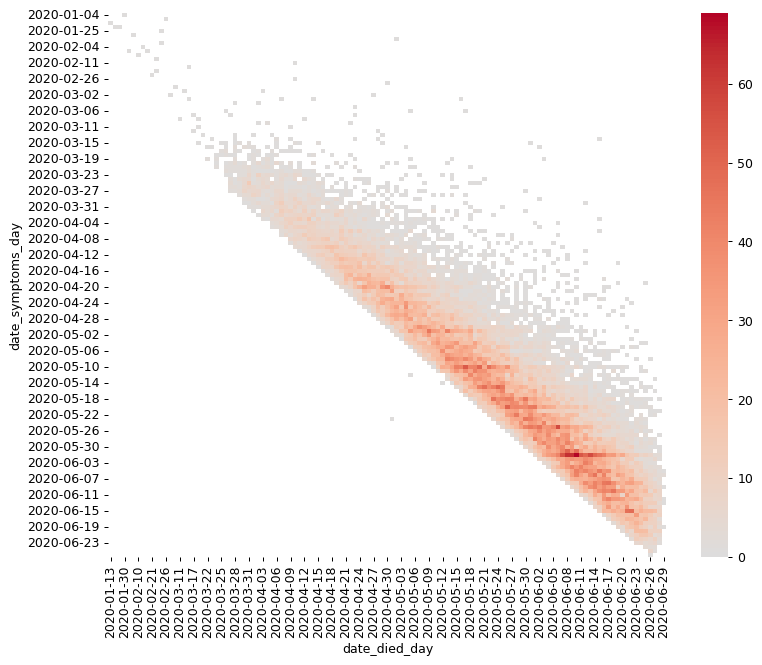

In [97]:
dates = covid_1.groupby(['date_symptoms_day', 'date_died_day']).size()
dates = dates.reset_index()
dates.columns = ['date_symptoms_day', 'date_died_day', 'count']


dates = dates.pivot('date_symptoms_day', 'date_died_day', 'count')
plt.figure(figsize=(10, 8), dpi= 90)

sns.heatmap(dates, center=0, vmin=0,
                cmap = "coolwarm")
plt.show()

In [98]:
covid_1['entry_diff'] = covid_1['entry_date_day'] - covid_1['date_symptoms_day']
covid_1['entry_diff'].value_counts().sort_index()

0 days     78448
1 days     62571
2 days     69670
3 days     71271
4 days     58012
5 days     45337
6 days     30434
7 days     28640
8 days     14732
9 days      9335
10 days     8173
11 days     5029
12 days     3697
13 days     3236
14 days     4214
15 days     2497
16 days      183
17 days      116
18 days       86
19 days       55
20 days       46
21 days       54
22 days       42
23 days       34
24 days       29
25 days       17
26 days       17
27 days       20
28 days       21
29 days       21
30 days       26
31 days       27
32 days       26
33 days       22
34 days       29
35 days       12
36 days        8
37 days       19
38 days       35
39 days       22
40 days        2
41 days        3
42 days        1
48 days        2
49 days        1
51 days        1
53 days        2
58 days        1
59 days        2
60 days        1
62 days        4
63 days        1
65 days        1
68 days        1
69 days        1
70 days        1
83 days        1
89 days        1
90 days       

<AxesSubplot:xlabel='date_diff', ylabel='Count'>

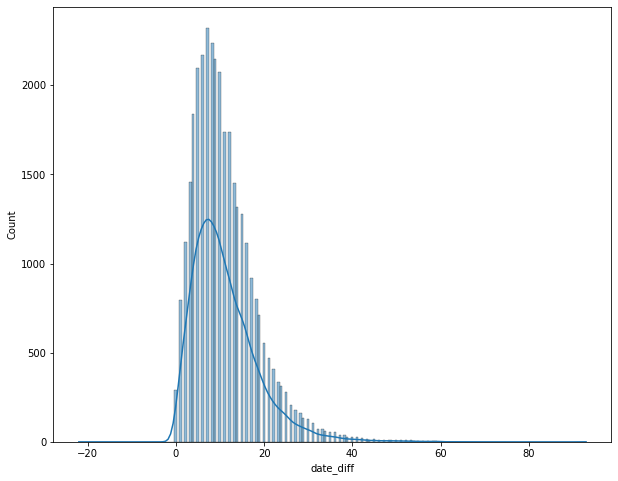

In [99]:
covid_1['date_diff'] = (covid_1['date_died_day'] - covid_1['date_symptoms_day']) / np.timedelta64(1, 'D')

date_interval = covid_1['date_diff']
date_interval = date_interval.dropna()
date_interval = date_interval.to_frame().reset_index(drop=True)
date_interval
plt.figure(figsize=(10, 8))
sns.histplot(data=date_interval, x='date_diff', kde=True)

## Exploração de variáveis

In [100]:
# Pacientes internados vs confirmacao covid
covid_internados = covid_1[covid_1['patient_type']==2]


In [101]:
# covid_1.apply(lambda x: x.unique())
# covid_1[['pregnancy','diabetes', 'copd', 'asthma', 'inmsupr']].apply()

Percebe-se correlação entre
- sex e pregnancy
- patient_type e intubed e icu
- Diseases: diabetes, copd, asthma, inmsupr, hypertension, other_disease, cardiovascular, obesity, renal_chronic, tobacco

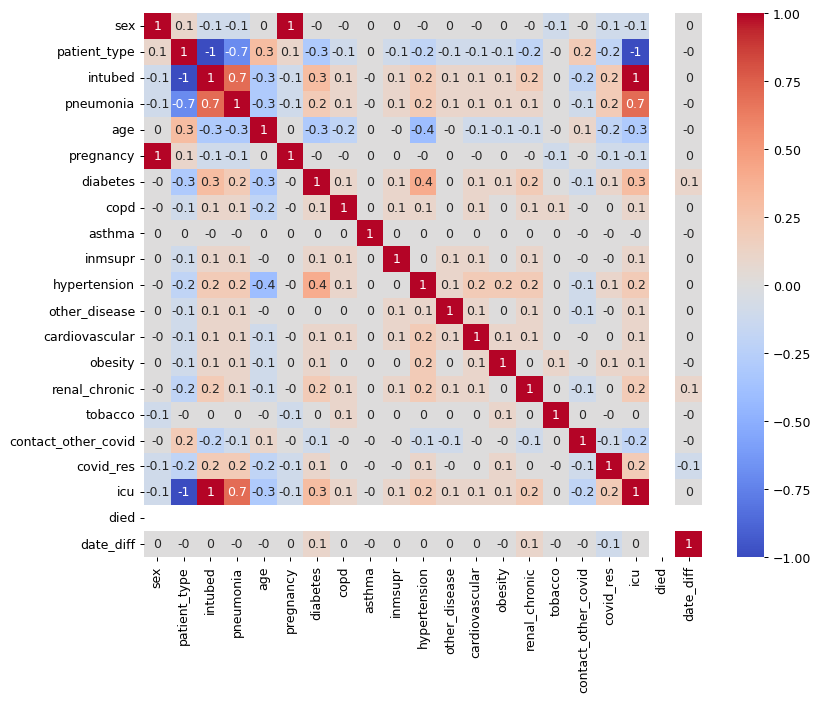

In [102]:
plt.figure(figsize=(10, 8), dpi= 90)
sns.heatmap(covid_1.corr().round(1),
                annot=True, center=0, vmin=-1, vmax=1,
                cmap = "coolwarm")
plt.show()

In [103]:
covid_1['pneumonia'].value_counts()

2    418784
1     77507
Name: pneumonia, dtype: int64

In [104]:
covid_1['pneumonia_bool'] = covid_1['pneumonia'].replace({1: True, 2: False})
covid_1['diabetes_bool'] = covid_1['diabetes'].replace({1: True, 2: False})
covid_1['copd_bool'] = covid_1['copd'].replace({1: True, 2: False})
covid_1['asthma_bool'] = covid_1['asthma'].replace({1: True, 2: False})
covid_1['inmsupr_bool'] = covid_1['inmsupr'].replace({1: True, 2: False})
covid_1['hypertension_bool'] = covid_1['hypertension'].replace({1: True, 2: False})
covid_1['other_disease_bool'] = covid_1['other_disease'].replace({1: True, 2: False})
covid_1['cardiovascular_bool'] = covid_1['cardiovascular'].replace({1: True, 2: False})
covid_1['obesity_bool'] = covid_1['obesity'].replace({1: True, 2: False})
covid_1['renal_chronic_bool'] = covid_1['renal_chronic'].replace({1: True, 2: False})
covid_1['tobacco_bool'] = covid_1['tobacco'].replace({1: True, 2: False})

covid_1['covid_res'] = covid_1['covid_res'].replace({1: True, 2: False})

In [105]:
comorbidities = ['pneumonia_bool', 'diabetes_bool', 'copd_bool', 'asthma_bool', 'inmsupr_bool', 'hypertension_bool', 'other_disease_bool', 'obesity_bool', 'renal_chronic_bool']
covid_1['comorbidities'] = covid_1[comorbidities].any(axis='columns')

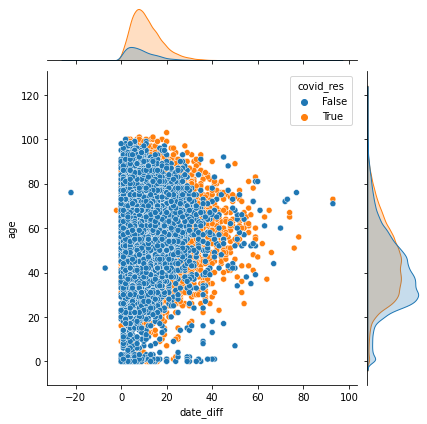

In [106]:
sns.jointplot(data=covid_1, x='date_diff', y='age', hue='covid_res')

In [107]:
covid_1['covid_res'].value_counts(normalize=True)

False    0.558924
True     0.441076
Name: covid_res, dtype: float64

In [108]:
covid_columns = ['sex', 'patient_type', 'age', 'contact_other_covid', 'covid_res', 'comorbidities']

In [109]:
covid_1['covid_res'].value_counts(normalize=True)

False    0.558924
True     0.441076
Name: covid_res, dtype: float64

Died, intubed - entra no caso de ter informações posteriores?

In [110]:
ml_covid = covid_1[covid_columns]

# Machine Learning


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [120]:
ml_covid.columns

Index(['sex', 'patient_type', 'age', 'contact_other_covid', 'covid_res',
       'comorbidities'],
      dtype='object')

In [122]:
X = ml_covid[['sex', 'patient_type', 'age', 'contact_other_covid', 'comorbidities']]
y = ml_covid['covid_res']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

KNN

In [127]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred


array([False, False,  True, ..., False,  True, False])

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.62      0.64      0.63     55546
        True       0.52      0.49      0.51     43713

    accuracy                           0.57     99259
   macro avg       0.57      0.57      0.57     99259
weighted avg       0.57      0.57      0.57     99259



In [131]:
def plot_complexity_curve(k_list, knn_model, x_train, x_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    
    # For each k
    for k in k_list:
        print(k)
        # Initialize, fit, predict
        knn = knn_model(k)
        
        knn.fit(x_train, y_train)
        
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))

    # Plot
    fig, ax = plt.subplots(figsize = [12,8])
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='blue')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='red')
    
#     diff_list = []
#     for (item1, item2) in zip(train_scores, test_scores):
#         diff_list.append(min([item1, item2]) + (item1 - item2))
    
#     ax.plot(k_list, diff_list, label='Testing Accuracy', color='green')

    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()

1
2
3
4


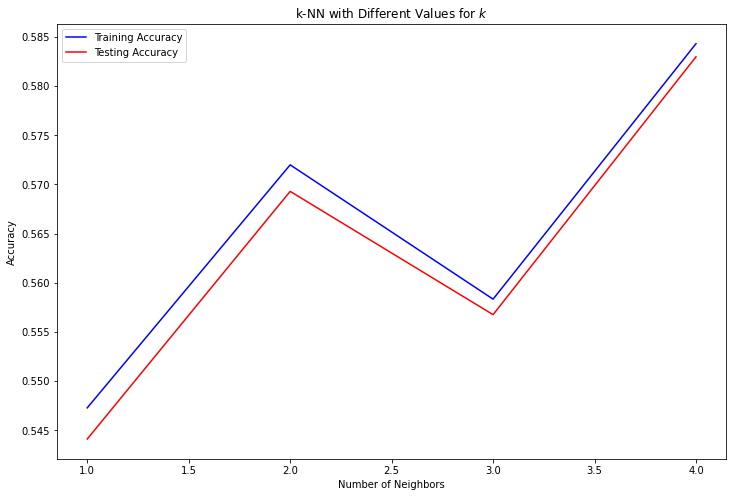

In [132]:
# Create possible values for k
neighbors = np.arange(1, 5)

plot_complexity_curve(neighbors, KNeighborsClassifier, X_train, X_test, y_train, y_test)

NB

In [133]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.63      0.80      0.70     55546
        True       0.61      0.40      0.48     43713

    accuracy                           0.62     99259
   macro avg       0.62      0.60      0.59     99259
weighted avg       0.62      0.62      0.61     99259



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=51a49710-5991-4d9e-8d88-f90d59cca546' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>